In [1]:
pip install pandas numpy scikit-learn matplotlib seaborn

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Load datasets
customer_data = pd.read_csv('customer_data (1).csv')
product_data = pd.read_csv('product_data.csv')

In [10]:
# Data Preprocessing
# Example: handle missing values
customer_data.fillna(method='ffill', inplace=True)

<ipython-input-10-0974e96d3385>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  customer_data.fillna(method='ffill', inplace=True)


In [11]:
# Feature Engineering: Create a total spend feature
customer_data['Total Spend'] = customer_data['Units Purchased'] * customer_data['Price']

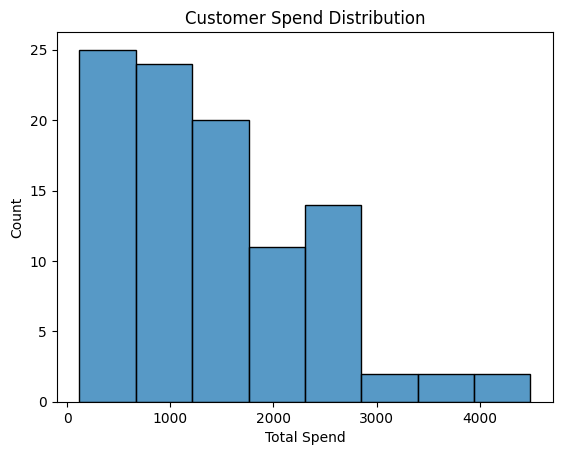

In [12]:
# EDA: Visualize customer distribution
sns.histplot(customer_data['Total Spend'])
plt.title('Customer Spend Distribution')
plt.show()

In [14]:
# Clustering for Segmentation
X = customer_data[['Total Spend', 'Frequency of Purchases']]  # Select features
kmeans = KMeans(n_clusters=5)  # Set the number of clusters
customer_data['Cluster'] = kmeans.fit_predict(X)

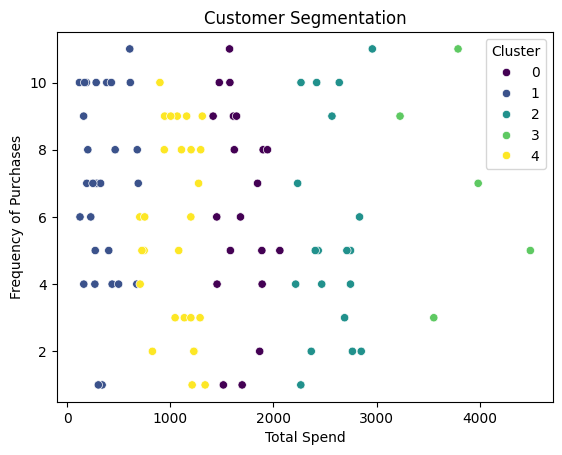

In [15]:
# Visualize the clusters
sns.scatterplot(data=customer_data, x='Total Spend', y='Frequency of Purchases', hue='Cluster', palette='viridis')
plt.title('Customer Segmentation')
plt.show()

In [16]:
# Product Analysis: Identify top-selling products
top_selling_products = product_data.groupby('Product Name').agg({'Units Sold': 'sum'}).sort_values(by='Units Sold', ascending=False)
print(top_selling_products.head())

              Units Sold
Product Name            
Product_8            882
Product_17           853
Product_11           706
Product_5            697
Product_12           560
